![iceberg-logo](https://www.apache.org/logos/res/iceberg/iceberg.png)

# Icebergの世界を体感しよう

## 本章のねらい：
- **Icebergの操作に慣れよう**  
- **Icebergのコンセプトに触れよう**

# Introduction

[Apache Iceberg](https://iceberg.apache.org/)は、2017年にNetflixが開発した、大規模なデータセットに最適化されたOpen Table Formatの一種です。  
オブジェクトストレージやHDFS上のデータをTrinoやSparkなどのエンジン/ツールで操作する基盤を運用する中で突き当たる機能的、性能的な限界を突破するために生まれました。  
大量のデータを扱う際の複雑さとパフォーマンスの問題を解決する様々な特徴を備えています。  

Open Table Format登場の背景やユースケースについては以下を参照してください。  
[データレイクの新しいカタチ：Open Table Formatの紹介](https://bering.hatenadiary.com/entry/2023/07/17/235246)

Icebergの代表的な特徴として、以下のような点が挙げられます。
- 同時書き込み、読み込みの一貫性(ACID)
    - [楽観的並行性制御](https://ja.wikipedia.org/wiki/%E6%A5%BD%E8%A6%B3%E7%9A%84%E4%B8%A6%E8%A1%8C%E6%80%A7%E5%88%B6%E5%BE%A1)等によりSERIALIZABLE Isolationを実現
- データ操作が高速
    - テーブルを構成するファイルやパーティションが増えてもオペレーションはO(1)
    - 統計情報などを活用した性能の最適化
- タイムトラベル
    - 過去のある時点の断面を遡って参照できる
- スキーマ/パーティション・エボリューション
    - スキーマやパーティションの変更に柔軟に対応
- Hidden パーティショニング
    - ユーザがテーブルの物理的な構造をあまり意識せずにパーティショニングの恩恵を受けられる

**もちろん、Icebergが活躍するのはNetflixのような莫大なデータを抱えているデータ基盤ばかりではありません。**  
HDFSやAmazon S3のようなオブジェクトストレージにデータを貯めて、TrinoやAmazon Athenaからクエリするような基盤を構築して、最初は便利だったものの、用途が複雑化、大規模化するに従って様々な運用上の課題に突き当たった経験はありませんか？  
ストリーミングやCDCのユースケースで、KafkaやFlinkのデータを蓄積して、操作する基盤の構築に悩んだ経験はありませんか？  
そのような場面で、Apache Icebergは役に立つ可能性があります。

Icebergの詳しい機能については今後のハンズオンで体験していくので、今は細かく把握しなくても問題ありません。詳細を知りたい方は以下をご参照ください。  
[Iceberg 公式 Doc](https://iceberg.apache.org/docs/latest/)  
[Apache Iceberg とは何か](https://bering.hatenadiary.com/entry/2023/09/24/175953)

ところで、Icebergの特徴に対して、人によっては「そんなことは既存のRDBMSなら当然に実現できるのでは...?」「なぜIcebergが必要なんだ...?」と疑問を持たれるかもしれません。  
  
確かに、Icebergの特徴の多くは既存のRDBMSでも実現可能です。  
従来のRDBMSはトランザクション処理の面で高い信頼性を提供しますが、データ量が膨大になるとコスト、パフォーマンス、スケーラビリティに課題を抱えることがあります。特に、ペタバイト級のデータセットを扱うビッグデータの世界では、RDBMSだけでは対応が難しいシナリオが存在します。

Apache Icebergは、このような大規模なデータセットの管理に特化しており、以下のような特徴を備えて従来のRDBMSとは異なるアプローチを提供します。

- スケーラビリティ: IcebergはオブジェクトストレージやHDFSといった分散ファイルシステム上で動作するよう設計されており、データの量が非常に多くなっても効率的に処理できます。
- パフォーマンス: Icebergはメタデータの管理に独自のアプローチを採用しており、大量のファイルやパーティションに跨るオペレーションでもパフォーマンスが低下しにくい設計となっています。これに対し、従来のRDBMSでは、テーブルのサイズが大きくなると、メタデータの管理がボトルネックとなりがちです。
- 統合と互換性: IcebergはApache Spark、Trino、Flinkなど、現代のデータ処理エンジンとの高い互換性を持っています。これにより、従来のRDBMSでは困難だった、異なるプラットフォーム間でのデータの統合と分析が容易になります。

まとめると、Icebergは従来のRDBMSの持つ信頼性や一貫性のメリットを維持しつつ、ビッグデータ時代の要求に応えるスケーラビリティ、パフォーマンス、柔軟性を提供するために必要とされる技術です。

もう一つ、近年の面白い傾向として、従来内部的なTable Formatをクローズに扱ってきたSnowflakeやBigQueryなどのDWH製品が、Icebergをサポートするようになってきています。  
つまり、All in OneなDWH製品でありつつも、データのレイヤーに関してはオープンなものにしておいて、他のエンジンからの相互乗り入れが可能になりつつある、ということです。  
これは文字通り「Open Table Format」が目指す未来の一端を示していて、新しいデータ基盤アーキテクチャへの可能性を秘めています。

# ハンズオン

説明はこれぐらいにして、ハンズオンに入っていきましょう

## Sparkセッションの作成

本ハンズオンでは、[Apache Spark](https://spark.apache.org/)を使ってデータを操作します。  

まずはSparkSessionのビルダーを使用して、新しいSparkセッションを作成または既存のセッションを取得します。これはSparkにアクセスするためのエントリーポイントとして機能します。

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Jupyter").getOrCreate()

spark

## サンプルデータを見てみよう

本ハンズオンではニューヨーク市が配布する、[ニューヨーク市タクシー・リムジン委員会の移動記録データ](https://aws.amazon.com/marketplace/pp/prodview-okyonroqg5b2u)を使用します。  
これはニューヨーク市のタクシーやハイアーの移動データで、月ごとのデータがカラムナーフォーマットである[Parquet形式](https://engineer.retty.me/entry/columnar-storage-format)で配布されています。  
データは`/home/iceberg/data/`配下に配置してあります。

In [ ]:
!ls /home/iceberg/data/

Icebergの世界に入る前に、先ずは元になるデータの中身を眺めてみましょう。

In [ ]:
df = spark.read.parquet("/home/iceberg/data/yellow_tripdata_2021-04.parquet")

### スキーマ

In [ ]:
df.printSchema()

各カラムの詳細は[こちら](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)で仕様が公開されているので、興味がある人は参照してみてください。

### レコードを見てみる

In [ ]:
df.limit(5).toPandas()

## Icebergテーブルを作ってみよう

それでは、この移動記録データをIcebergのテーブルに変換してみます。  
月ごとにファイルが分かれていますが、ひとまず`yellow_tripdata_2021-04.parquet`の一ヶ月分を対象にしてみましょう。

### データベースを作成

In [ ]:
%%sql

CREATE DATABASE IF NOT EXISTS nyc

ここでは、[Spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html)を使用しています。  
magic %%sqlでSpark SQLが実行できる仕組みが気になる方は、リポジトリの`spark/ipython/startup/00-prettytables.py`を確認してください。

### `yellow_tripdata_2021-04.parquet`をロードしてIcebergテーブルとして保存

In [ ]:
%%sql
-- ノートブックを何度も再実行できるようにするために、テーブルが存在する場合は削除する
DROP TABLE IF EXISTS nyc.taxis PURGE

In [ ]:
df = spark.read.parquet("/home/iceberg/data/yellow_tripdata_2021-04.parquet")
df.write.saveAsTable("nyc.taxis")

この環境ではSparkがIcebergを利用するように設定されている(リポジトリの`spark/spark-defaults.conf`)ため、`df.write.saveAsTable("nyc.taxis")`とするだけで自動的にIcebergフォーマットで保存されます。

これで`yellow_tripdata_2021-04.parquet`を基にデータベース`nyx`に属する`taxis`テーブルとしてIcebergのテーブルを作成することが出来ました。  
テーブルの中身を確認してみましょう。

In [ ]:
%%sql

SELECT * FROM nyc.taxis

それでは、`nyc.taxis`テーブルはストレージ上にどのように保存されているのでしょうか？  
minIOの管理画面`http://localhost:9001/`を開いて、`warehouse`バケットの中を見てみましょう。

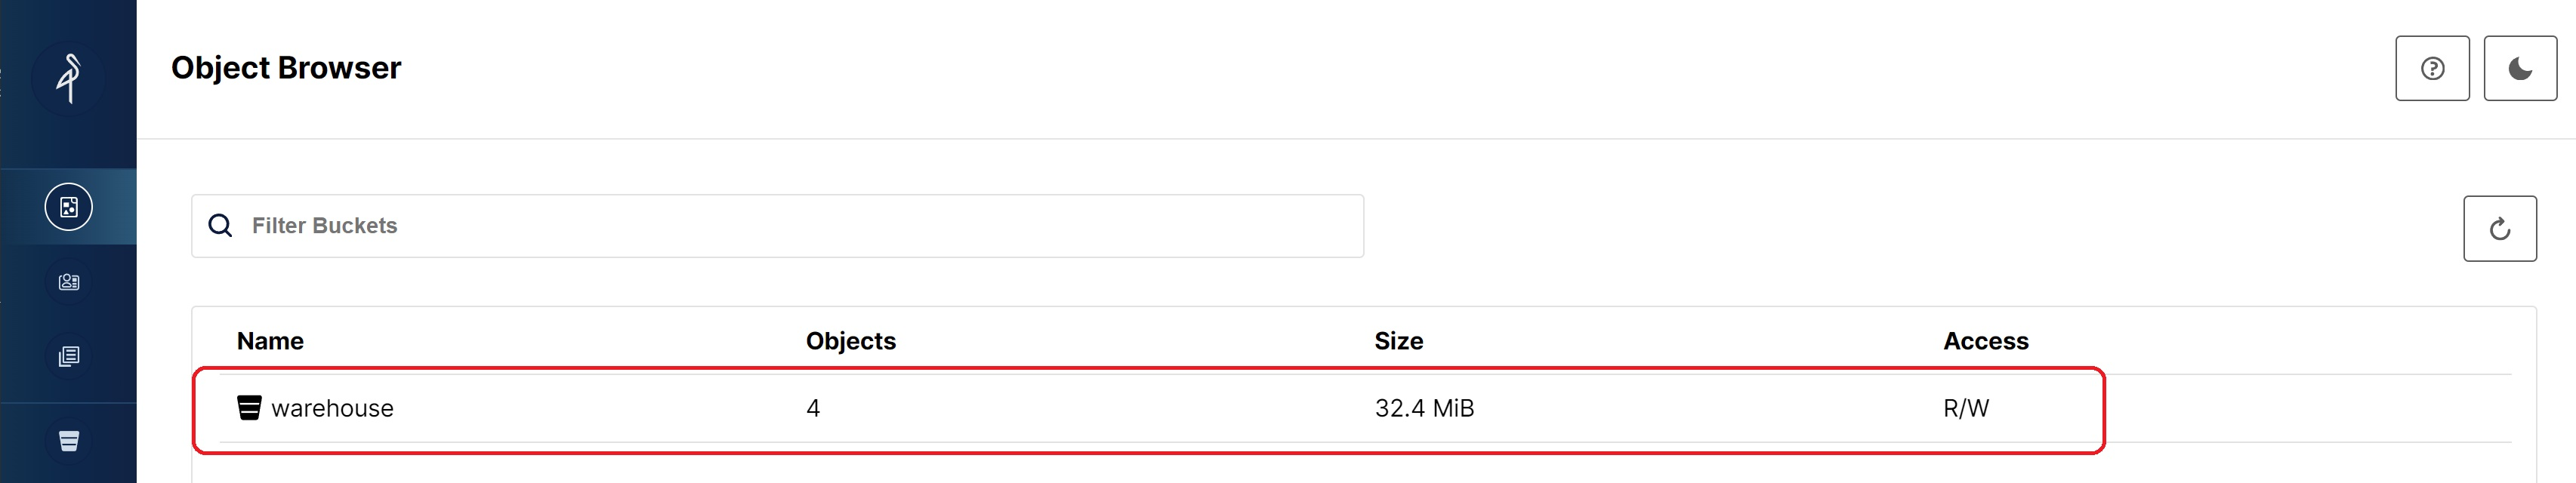

`warehouse`バケットの中の`nyc`を開くと、先ほど作成したテーブルのデータが入った`taxis`が現れます。こちらを開いてみましょう。

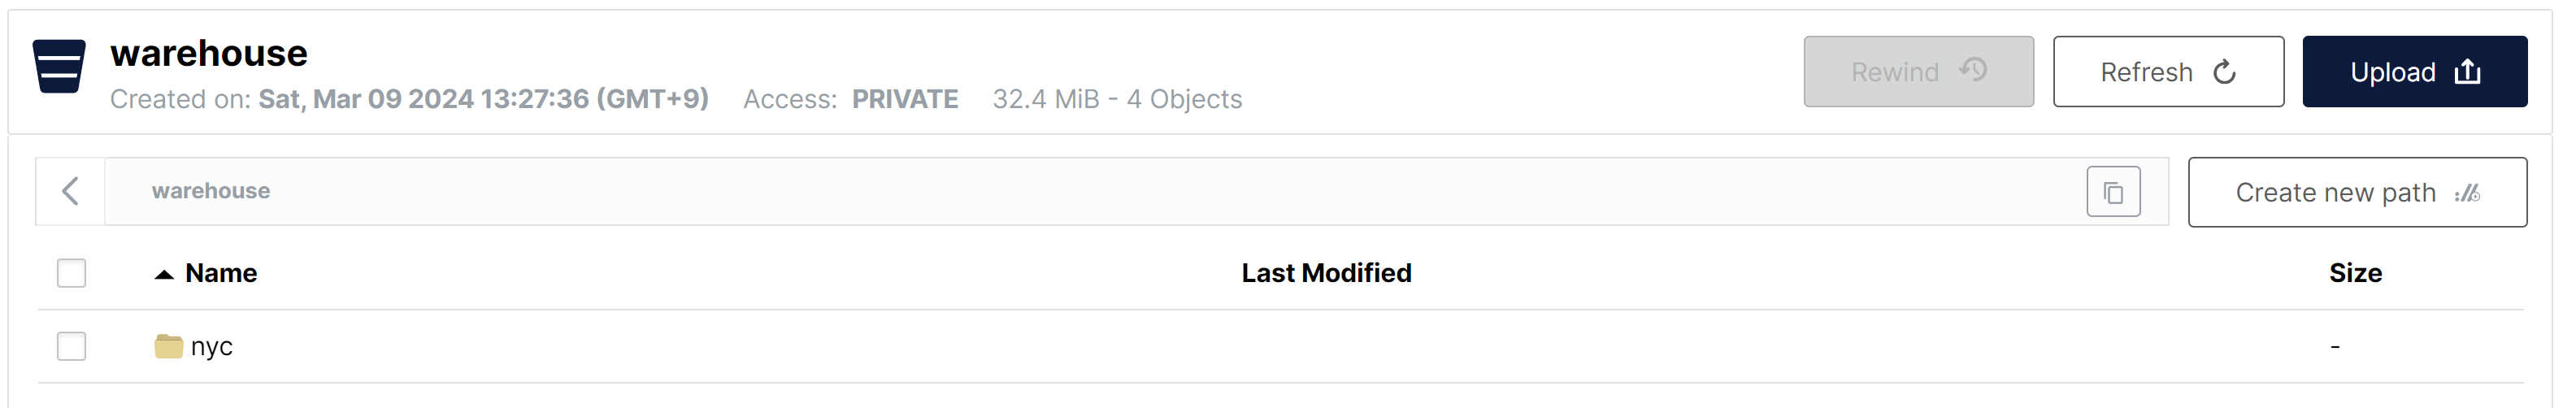
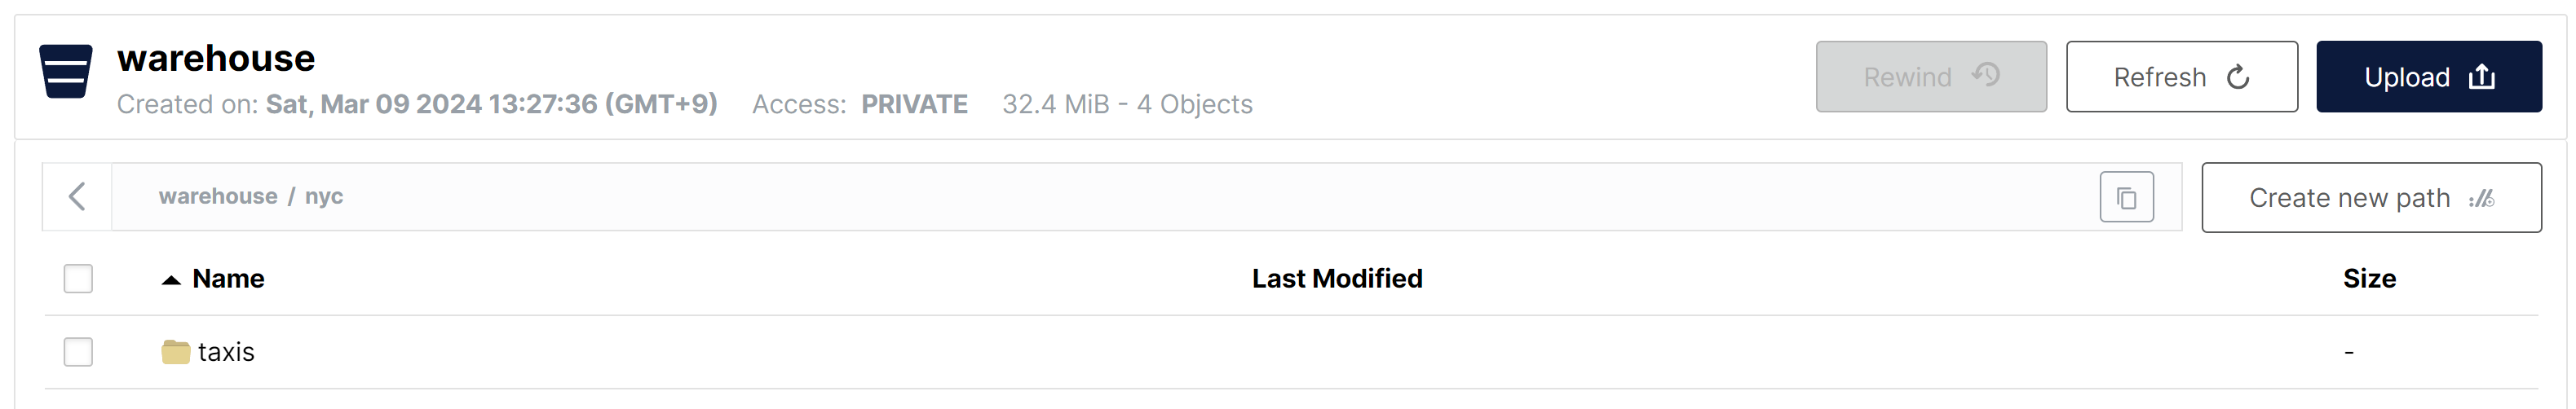

`taxis`を開くと、`data`と`metadata`が入っています。これらがIcebergテーブルの実体です。  
本章ではIcebergのテーブル構造を細かく理解することを目指していませんが、せっかくなのでこれらの中身を少し探検してみましょう。  
まずは`data`の方を見てみます。

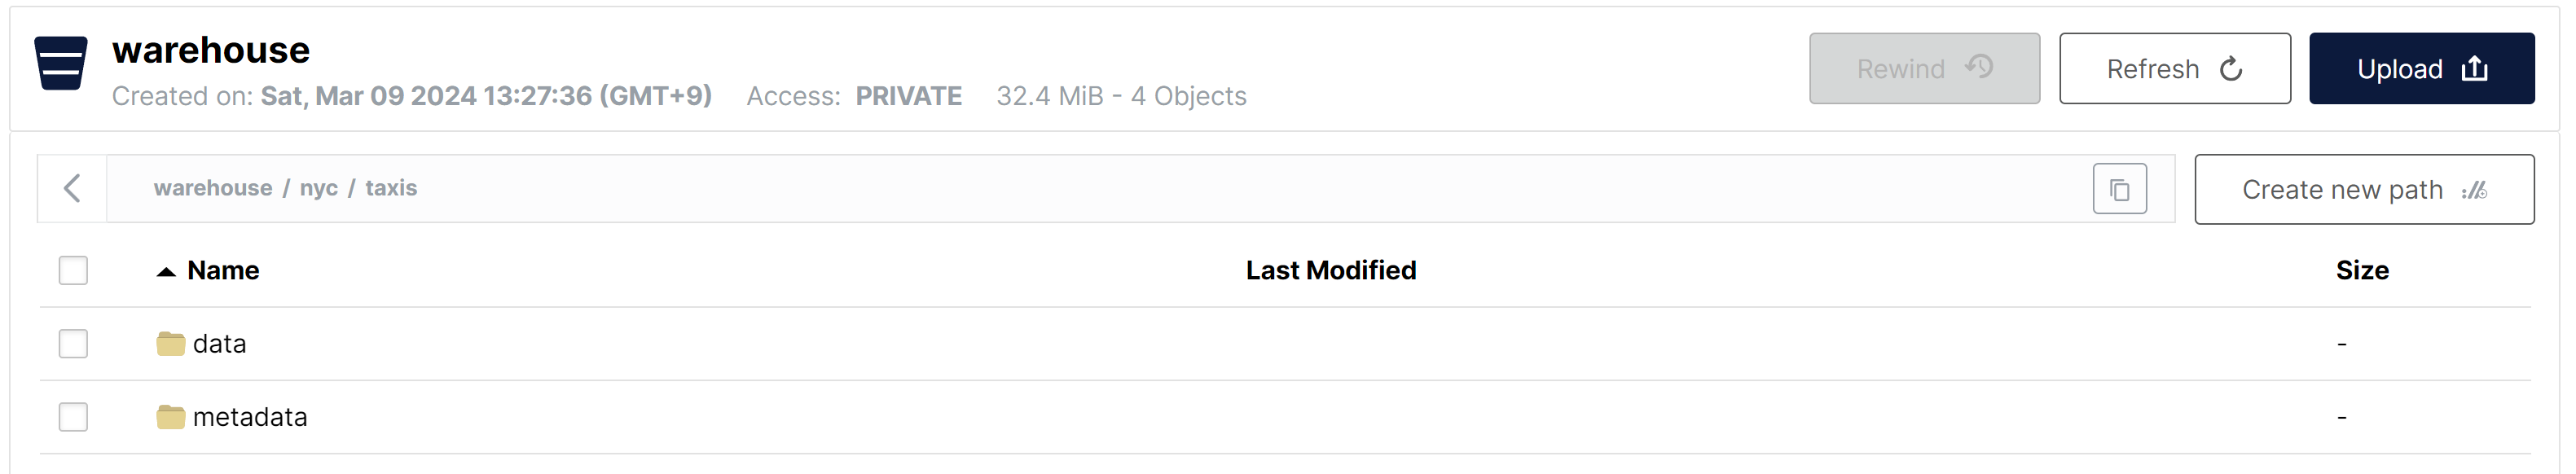

なにやらparquet形式のファイルが入っています。実はこれがIcebergテーブルの実データです。  
そうです、Icebergの実データはparquetで保存されているのです！([parquet, avro, orcから選択可能](https://iceberg.apache.org/spec/#version-1-analytic-data-tables))  

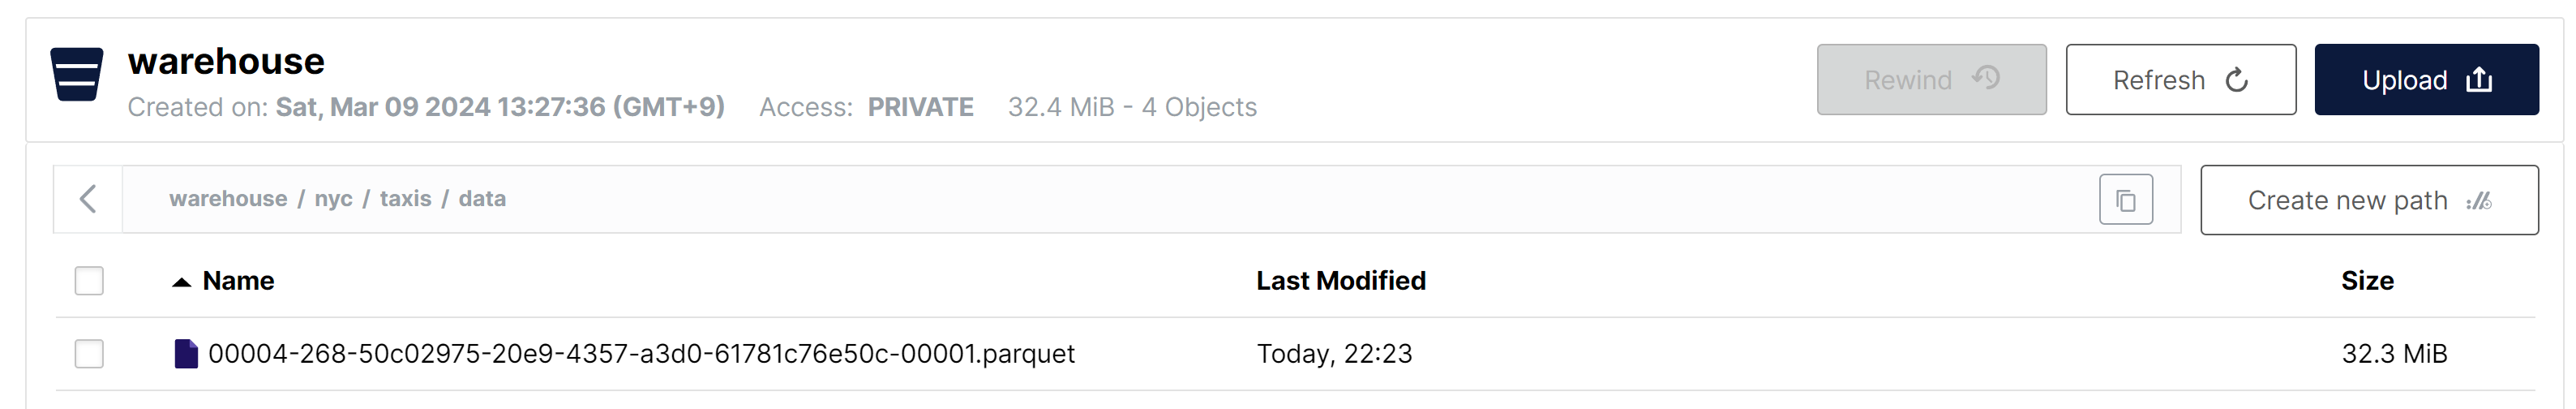

次は`metadata`を見てみましょう。  
avro形式とjson形式のファイルが入っています。これが`taxis`テーブルのメタデータで、スキーマ情報をはじめとする、Icebergの便利な仕組みを実現するのに必要な様々な情報が入っています。

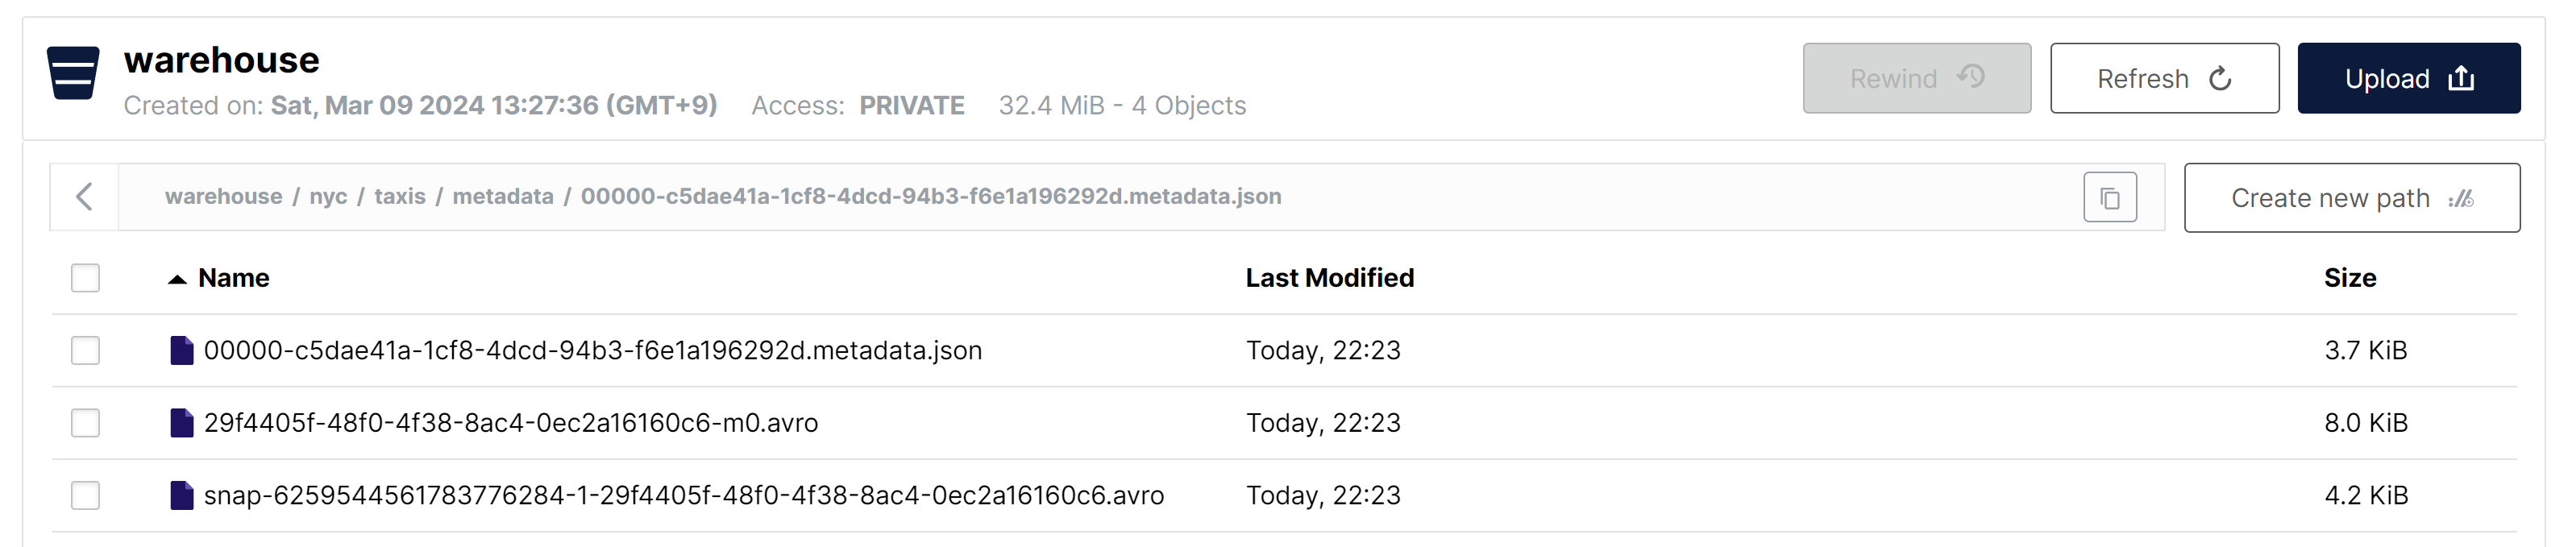

このように、Icebergテーブルは、Iceberg専用の特別なファイルフォーマットが存在するわけではなく、jsonやavro,parquetなどのファイルで構成されます。  
もしIcebergのアーキテクチャを詳しく知りたい場合は[こちら](https://bering.hatenadiary.com/entry/2023/09/24/175953#Iceberg%E3%81%AE%E3%82%A2%E3%83%BC%E3%82%AD%E3%83%86%E3%82%AF%E3%83%81%E3%83%A3)をご参照ください

## タイムトラベルを体験してみよう
タイムトラベルを体験するため、テーブルにいくつかの変更を加えてみましょう。

In [ ]:
# テーブル変更前の時間を記録(後ほど使います)
from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

### passenger_countを全部5にしてみる

In [ ]:
%%sql
-- 変更前
SELECT passenger_count FROM nyc.taxis limit 3

In [ ]:
%%sql
-- passenger_countを全部5にしてみる
UPDATE nyc.taxis SET passenger_count = 5

In [ ]:
%%sql
-- 変更後
SELECT passenger_count FROM nyc.taxis limit 3

### 全レコードを削除！！！

In [ ]:
%%sql
-- 変更前
SELECT * FROM nyc.taxis

In [ ]:
%%sql

DELETE FROM nyc.taxis

In [ ]:
%%sql
-- 変更後
SELECT * FROM nyc.taxis

### タイムトラベル！！！

やれやれ...なんだかハチャメチャになってしまいましたね。。  
でも安心してください、Icebergには強力なタイムトラベルの仕組みがあります。

In [ ]:
%%sql
-- 一連のテーブル変更以前の断面にクエリ
-- AS OF以降にはテーブル変更前に記録したタイムスタンプを指定してください
SELECT * FROM nyc.taxis TIMESTAMP AS OF '2024-03-10 11:55:44';

メタデータテーブル`.snapshots`にはtaxisテーブルへの変更のSNAPSHOTが記録されています。

In [ ]:
%%sql

SELECT * FROM nyc.taxis.snapshots

メタデータテーブル`.snapshots`の`snapshot_id`カラムを指定すると、ある時点のスナップショットにクエリ出来ます。

In [ ]:
%%sql
-- AS OF以降には任意のsnapshot_idを指定してください
SELECT * FROM nyc.taxis VERSION AS OF '6187266314545415788';

Icebergの[Stored procedures](https://iceberg.apache.org/docs/latest/spark-procedures/)を利用すれば、一連の変更を加える前の最初のSNAPSHOTの断面にロールバックできます。

In [ ]:
first_snapshot_id = spark.table("nyc.taxis.snapshots").orderBy("committed_at").select("snapshot_id").first()[0]
first_snapshot_id

In [ ]:
spark.sql(f"CALL demo.system.rollback_to_snapshot('nyc.taxis', {first_snapshot_id})")

In [ ]:
%%sql
-- ロールバック結果を確認
SELECT * FROM nyc.taxis

## 同時実行制御を体験してみよう

IcebergはSERIALIZABLE isolation/ACIDをサポート(*)しており、複数のクライアントが同時書き込みを行った場合でもテーブルの整合性を確保できます。  
*SNAPSHOT isolationも選択可能  

その効果を簡単に体感するため、2人のユーザーが同時に同じレコードのfare_amountを操作する状況を以下で擬似的に再現してみます。  
以下のセルでは、2つのスレッドがfare_amountに対して足し算と引き算を行っています。同時実行制御の仕組みがない構成でこれらを同時に実行すると、データの整合性が破壊されるリスクがあります。  
Icebergではどうなるでしょうか？セルを実行してみてください。

In [ ]:
import threading

def update_taxi_data(user_id, fare_amount_delta):
    query = f"""
        UPDATE nyc.taxis
        SET fare_amount = fare_amount + {fare_amount_delta}
        WHERE VendorID = 1
    """
    spark.sql(query)
    print(f"User {user_id} updated the fare amount by {fare_amount_delta}")

threads = []

# ユーザー1は料金を5ドル増やす
thread1 = threading.Thread(target=update_taxi_data, args=(1, 5.0))
threads.append(thread1)

# ユーザー2は料金を3ドル減らす
thread2 = threading.Thread(target=update_taxi_data, args=(2, -3.0))
threads.append(thread2)

# 全てのスレッドを開始
for thread in threads:
    thread.start()

# 全てのスレッドが完了するまで待機
for thread in threads:
    thread.join()

片方のスレッドで以下のエラーが発生したはずです。
> org.apache.iceberg.exceptions.ValidationException: Found conflicting files that can contain records matching ref(name="VendorID") == 1

これは、Icebergの仕組みが競合を検出して処理をabortさせたことを意味しています。このように、Icebergは複数のクライアントが同時に書き込みを行った場合でもデータの整合性を担保できます。  
(ここでは分かりやすさのために競合発生時のExceptionをそのまま発生させていますが、実際には適宜Retry処理を行うことになります)  
  
Icebergの同時実行制御について詳しく知りたい方は以下を参考にしてください。  
- [How Apache Iceberg enables ACID compliance for data lakes](https://medium.com/snowflake/how-apache-iceberg-enables-acid-compliance-for-data-lakes-9069ae783b60)
- [簡単な説明](https://speakerdeck.com/bering/apache-iceberg-catalogxuan-ze-nohointo-b44726a4-a8c8-49fc-9f06-7eb5729c9d7d?slide=6)

## スキーマエボリューションを体験してみよう

従来のHive Styleフォーマットでは、一部のスキーマ変更時にテーブル全体を作り直さなければならないことがありました。  
Icebergでは、テーブルを作り直すことなく[様々なスキーマ変更](https://iceberg.apache.org/docs/latest/evolution/)を適用し、新旧データを一貫して処理出来ます。

In [ ]:
%%sql
-- 現状のスキーマを確認
DESC nyc.taxis

In [ ]:
%%sql

-- fare_amountの名前をfareに変更
ALTER TABLE nyc.taxis RENAME COLUMN fare_amount TO fare

In [ ]:
%%sql

-- trip_distanceの名前をdistanceに変更
ALTER TABLE nyc.taxis RENAME COLUMN trip_distance TO distance

In [ ]:
%%sql
-- distanceにコメントを付与
ALTER TABLE nyc.taxis ALTER COLUMN distance COMMENT 'The elapsed trip distance in miles reported by the taximeter.'

In [ ]:
%%sql
-- distanceの型をdoubleに変更
ALTER TABLE nyc.taxis ALTER COLUMN distance TYPE double;

In [ ]:
%%sql
-- distanceの位置をfareの後ろに移動
ALTER TABLE nyc.taxis ALTER COLUMN distance AFTER fare;

In [ ]:
%%sql
-- 新しいカラムfare_per_distance_unitを追加
ALTER TABLE nyc.taxis ADD COLUMN fare_per_distance_unit float AFTER distance

In [ ]:
%%sql
-- 変更後
DESC nyc.taxis

In [ ]:
%%sql
-- fare/distanceをfare_per_distance_unitに設定
UPDATE nyc.taxis SET fare_per_distance_unit = fare/distance

このように、テーブルを作り直すことなく様々なスキーマ変更が適用できます。

In [ ]:
%%sql

SELECT
VendorID
,tpep_pickup_datetime
,tpep_dropoff_datetime
,fare
,distance
,fare_per_distance_unit
FROM nyc.taxis

この状態でもタイムトラベルクエリを駆使すれば、過去のスナップショット/スキーマへのクエリが可能です。

In [ ]:
spark.sql(f"SELECT * FROM nyc.taxis VERSION AS OF '{first_snapshot_id}'").toPandas()